
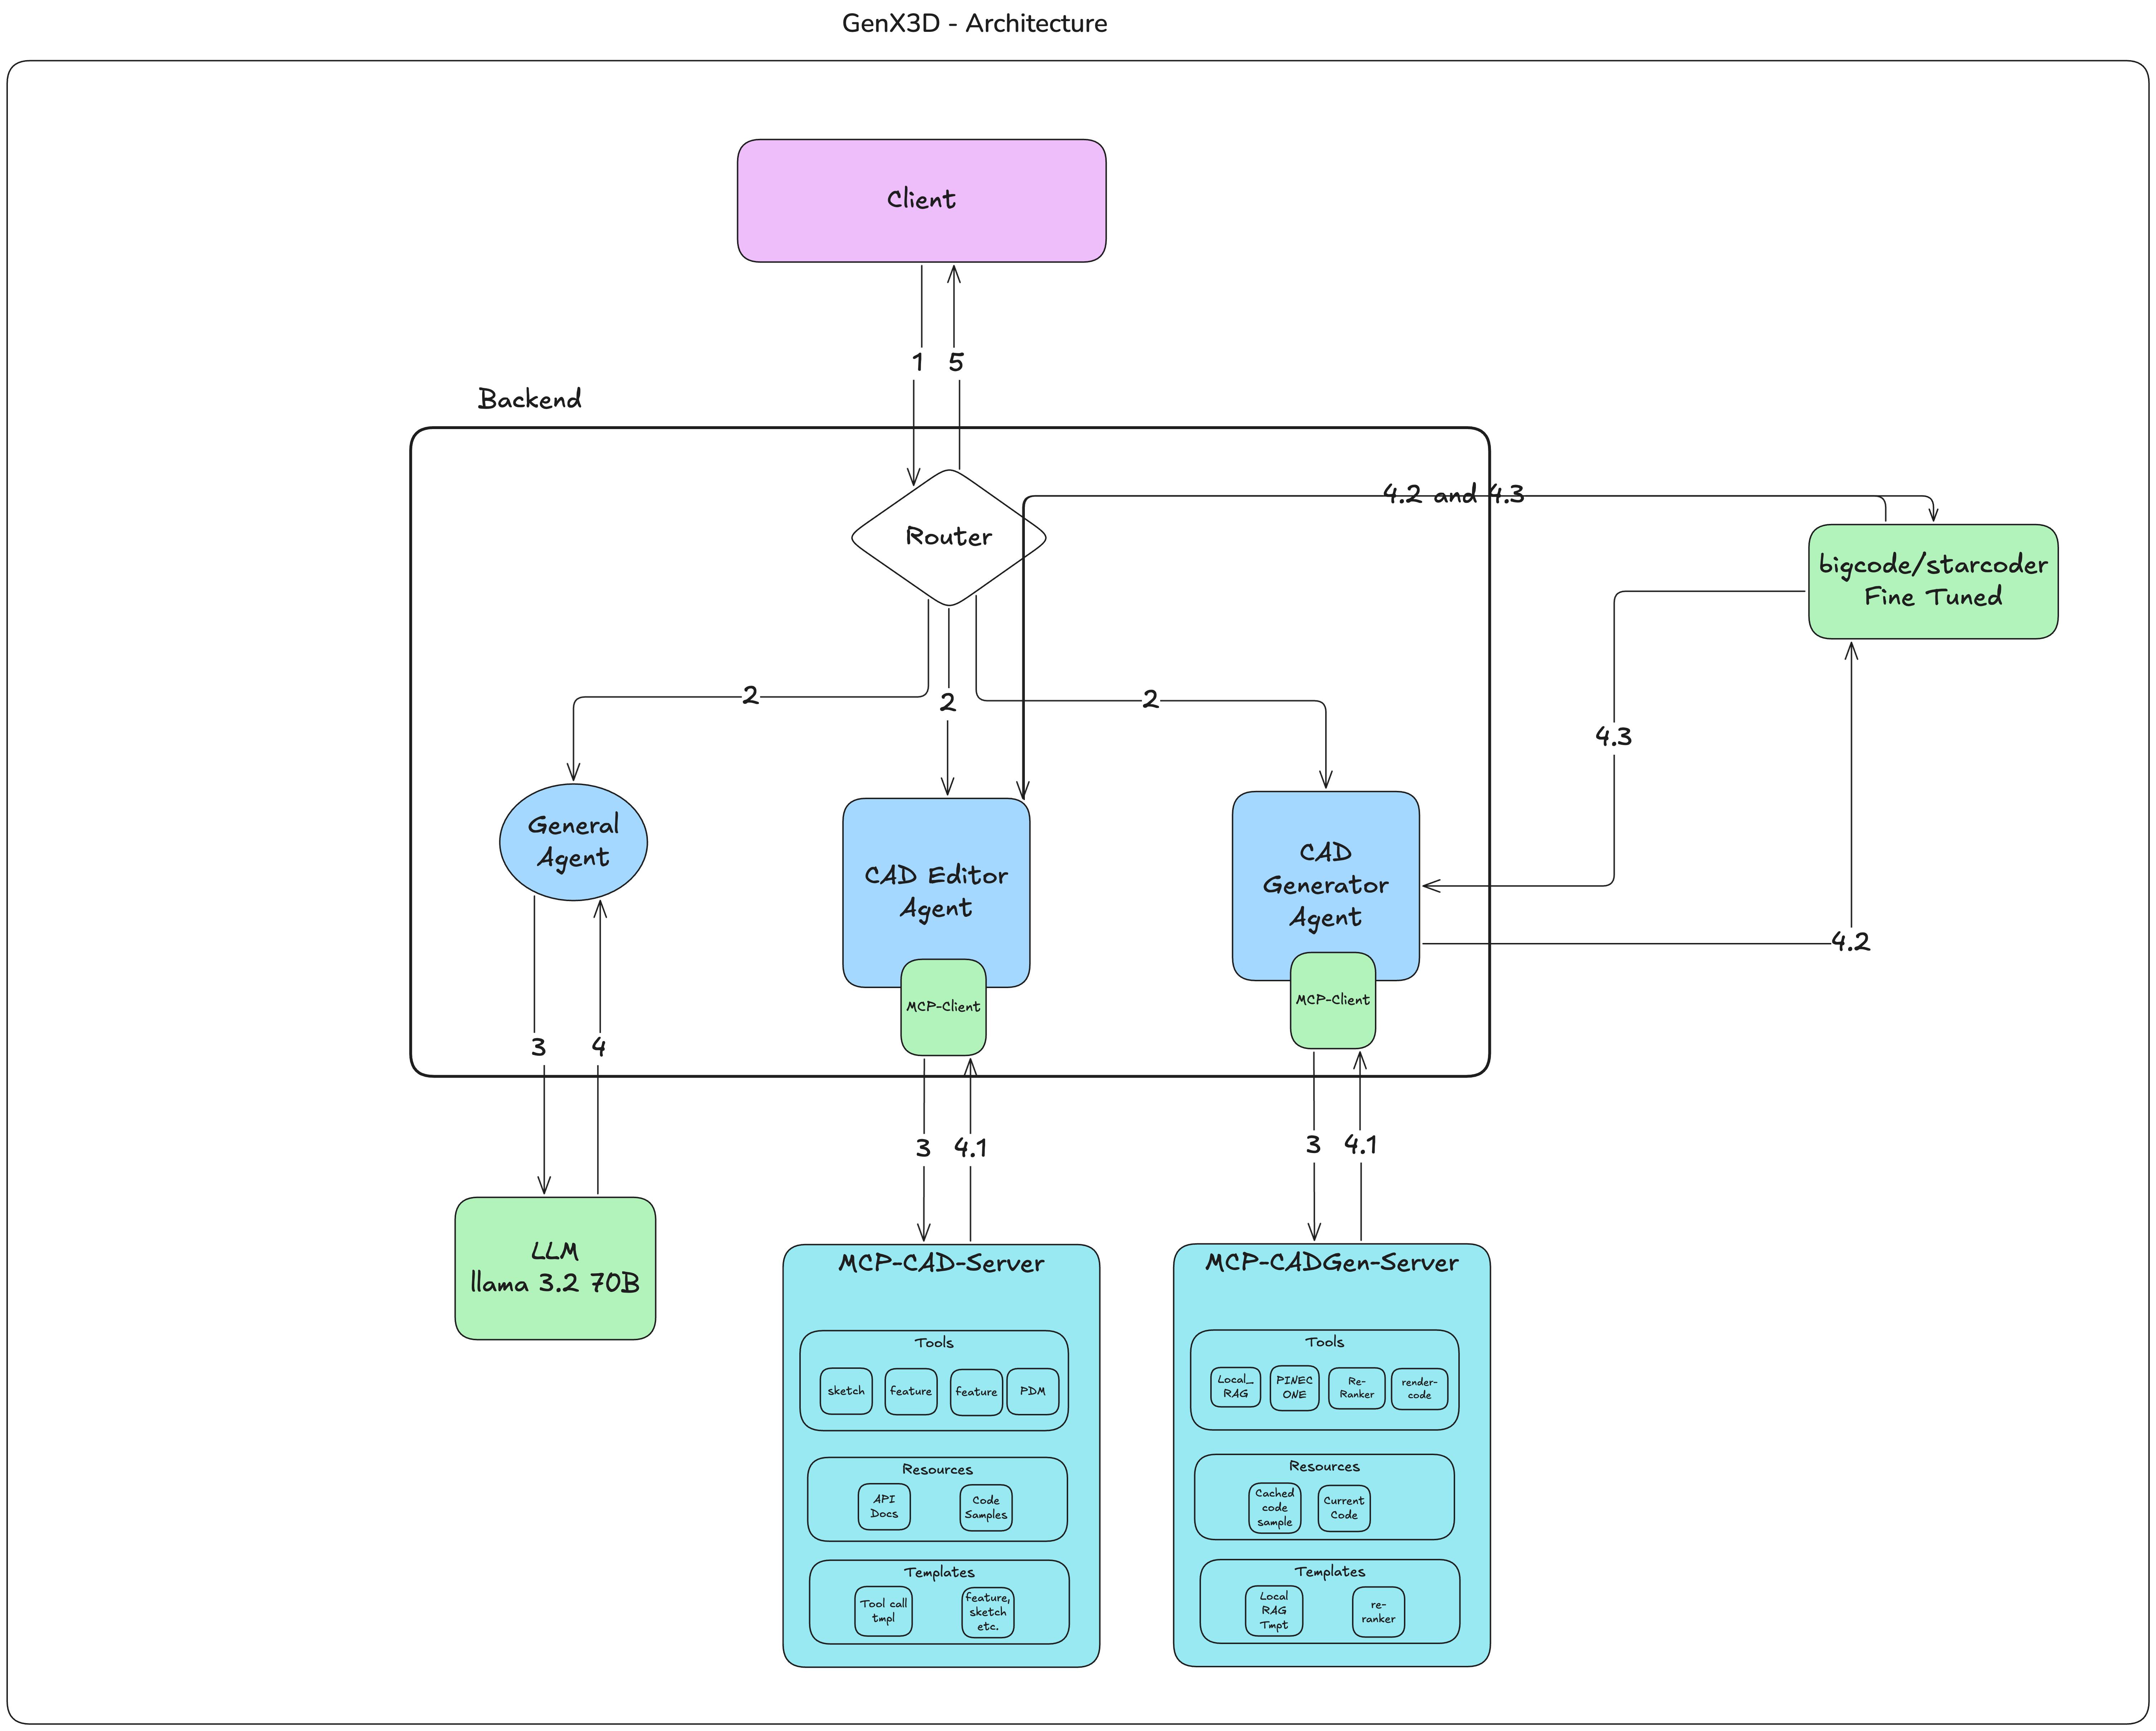


# Implementation Prototype - using MCP Claude


## 1. MCP Server (Example: mcp-cad-server)

Each MCP server exposes tools, resources, and templates.

In [ ]:
# mcp_cad_server.py
from mcp.server import Server, tool, resource, template

server = Server("mcp-cad-server")

# ----------------------
# Tools 🛠️ (Editing ops)
# ----------------------
@tool(server)
async def sketch(params: dict) -> str:
    """Create or modify a CAD sketch"""
    return f"[sketch] Created sketch with params: {params}"

@tool(server)
async def extrude(params: dict) -> str:
    """Perform extrusion on a sketch"""
    return f"[extrude] Extruded with params: {params}"

@tool(server)
async def fillet(params: dict) -> str:
    """Add fillet/chamfer to edges"""
    return f"[fillet] Applied with params: {params}"

@tool(server)
async def boolean_union(params: dict) -> str:
    """Union two shapes"""
    return f"[boolean_union] Union operation on {params}"

@tool(server)
async def boolean_subtract(params: dict) -> str:
    """Subtract one shape from another"""
    return f"[boolean_subtract] Subtraction operation on {params}"

# ----------------------
# Resources 📚
# ----------------------
@resource(server)
async def cad_docs():
    return {"docs": "CAD API documentation and standards"}

@resource(server)
async def shape_library():
    return {"shapes": ["circle", "square", "gear", "bolt"]}

@resource(server)
async def standards():
    return {"ISO": "CAD ISO standards", "company": "Company-specific CAD standards"}

# ----------------------
# Templates 🧩
# ----------------------
@template(server)
async def basic_sketch_template():
    return {"template": "def sketch():\n    # define base sketch here"}

@template(server)
async def feature_template():
    return {"template": "def feature():\n    # hole/thread/rib feature template"}

if __name__ == "__main__":
    server.run()


## 2. MCP Server (Example: mcp-cadgen-server)

In [ ]:
# mcp_cadgen_server.py
from mcp.server import Server, tool, resource, template

server = Server("mcp-cadgen-server")

# ----------------------
# Tools 🛠️ (Generation ops)
# ----------------------
@tool(server)
async def generate_cad_code(params: dict) -> str:
    """Generate CAD code from natural language prompt (calls Starcoder FT)"""
    prompt = params.get("prompt", "")
    return f"[generate_cad_code] CAD code for: {prompt}"

@tool(server)
async def render_model(params: dict) -> str:
    """Render geometry from CAD code"""
    code = params.get("code", "")
    return f"[render_model] Rendered model for code snippet: {code[:30]}..."

@tool(server)
async def validate_model(params: dict) -> str:
    """Check syntax and semantics of CAD code"""
    code = params.get("code", "")
    return f"[validate_model] CAD code validation result for: {code[:30]}..."

@tool(server)
async def compare_geometry(params: dict) -> str:
    """Compare generated CAD with ground truth via IOU/geometry metrics"""
    return f"[compare_geometry] Compared {params}"

# ----------------------
# Resources 📚
# ----------------------
@resource(server)
async def code_snippets():
    return {"snippets": ["cube(size=10)", "cylinder(radius=5, height=20)", "sphere(radius=10)"]}

@resource(server)
async def component_library():
    return {"components": ["M6 bolt", "gear 20T", "hinge", "bearing"]}

@resource(server)
async def examples():
    return {"examples": ["gearbox assembly", "robot arm", "drone frame"]}

# ----------------------
# Templates 🧩
# ----------------------
@template(server)
async def part_template():
    return {"template": "def part():\n    # define part geometry here"}

@template(server)
async def assembly_template():
    return {"template": "def assembly():\n    # combine multiple parts here"}

@template(server)
async def render_template():
    return {"template": "def render():\n    # configure CAD rendering here"}

if __name__ == "__main__":
    server.run()


## 3. MCP Client (Example: cad_editor_agent)

The CAD Editor Agent connects as an MCP client to the mcp-cad-server:

In [ ]:
# cad_editor_agent.py
import asyncio
from mcp.client import Client

async def main():
    # Connect to MCP CAD Editor Server
    client = Client("mcp-cad-server", "http://localhost:5000")
    await client.connect()

    print("✅ Connected to MCP-CAD-Server")

    # --- Call a Tool ---
    sketch_response = await client.call_tool("sketch", {"shape": "circle", "radius": 10})
    print("Sketch Tool Response:", sketch_response)

    # --- Call another Tool ---
    extrude_response = await client.call_tool("extrude", {"height": 20})
    print("Extrude Tool Response:", extrude_response)

    # --- Get a Resource ---
    docs = await client.get_resource("cad_docs")
    print("CAD Docs Resource:", docs)

    # --- Use a Template ---
    sketch_template = await client.get_template("basic_sketch_template")
    print("Sketch Template:", sketch_template)

if __name__ == "__main__":
    asyncio.run(main())


## 4. MCP Client (Example: cad_generator_agent)

The CAD Generator Agent connects as an MCP client to the mcp-cadgen-server:

In [ ]:
# cad_generator_agent.py
import asyncio
from mcp.client import Client

async def main():
    # Connect to MCP CAD Generator Server
    client = Client("mcp-cadgen-server", "http://localhost:6000")
    await client.connect()

    print("✅ Connected to MCP-CADGen-Server")

    # --- Call a Tool (CAD Generation) ---
    gen_response = await client.call_tool("generate_cad_code", {"prompt": "create a cube of size 10"})
    print("Generate CAD Code Response:", gen_response)

    # --- Render the model ---
    render_response = await client.call_tool("render_model", {"code": "cube(size=10)"})
    print("Render Response:", render_response)

    # --- Validate model ---
    validate_response = await client.call_tool("validate_model", {"code": "cube(size=10)"})
    print("Validation Response:", validate_response)

    # --- Use a Resource (Snippets) ---
    snippets = await client.get_resource("code_snippets")
    print("Code Snippets Resource:", snippets)

    # --- Use a Template ---
    part_template = await client.get_template("part_template")
    print("Part Template:", part_template)

if __name__ == "__main__":
    asyncio.run(main())


# run the prototype
## How to Run

1. Start the MCP servers (in separate terminals):

   ```bash
   python mcp_cad_server.py --port 5000
   python mcp_cadgen_server.py --port 6000
   ```

2. Run the clients:

   ```bash
   python cad_editor_agent.py
   python cad_generator_agent.py
   ```

3. You should see stubbed responses like:

   ```
   Connected to MCP-CAD-Server
   Sketch Tool Response: [sketch] Created sketch with params: {'shape': 'circle', 'radius': 10}
   ...
   Connected to MCP-CADGen-Server
   Generate CAD Code Response: [generate_cad_code] CAD code for: create a cube of size 10
   ...
   ```

---
 **full working skeleton**:

* **Servers** expose tools/resources/templates.
* **Clients** (agents) connect and call them.
* You can now replace stubs with real CAD APIs, rendering engines, validation pipelines, and your Starcoder FT inference.



## Router

In [ ]:
# router_agent.py
import asyncio
from mcp.client import Client

class RouterAgent:
    def __init__(self):
        self.editor_client = Client("mcp-cad-server", "http://localhost:5000")
        self.generator_client = Client("mcp-cadgen-server", "http://localhost:6000")

    async def connect(self):
        await self.editor_client.connect()
        await self.generator_client.connect()
        print("✅ Router connected to both MCP servers")

    async def route(self, user_input: str):
        """
        Simple routing logic:
        - If input contains keywords like 'edit', 'modify', 'extrude' -> CAD Editor
        - Otherwise (e.g. 'create', 'generate', 'new') -> CAD Generator
        """

        if any(word in user_input.lower() for word in ["edit", "modify", "extrude", "fillet", "union", "subtract"]):
            print("📌 Routing to CAD Editor Server")
            return await self.editor_client.call_tool("sketch", {"action": user_input})

        elif any(word in user_input.lower() for word in ["create", "generate", "new", "build", "design"]):
            print("📌 Routing to CAD Generator Server")
            return await self.generator_client.call_tool("generate_cad_code", {"prompt": user_input})

        else:
            return f"❓ Unknown request type: {user_input}"

async def main():
    router = RouterAgent()
    await router.connect()

    # Example user requests
    resp1 = await router.route("create a cube of size 10")
    print("Response 1:", resp1)

    resp2 = await router.route("edit the sketch to add a circle")
    print("Response 2:", resp2)

if __name__ == "__main__":
    asyncio.run(main())


# with auto tool observabiltiy


In [ ]:
# cad_editor_agent_fastmcp.py
import asyncio
from fastmcp import FastMCPClient

async def main():
    client = FastMCPClient(name="cad_editor_agent", server_url="http://localhost:5000")
    await client.connect()
    print("✅ Connected to MCP-CAD-Server")

    # Tool call: sketch
    sketch_resp = await client.call_tool("sketch", {"shape": "circle", "radius": 10})
    print("Sketch Tool Response:", sketch_resp)

    # Tool call: extrude
    extrude_resp = await client.call_tool("extrude", {"height": 20})
    print("Extrude Tool Response:", extrude_resp)

    # Fetch resource: cad_docs
    docs = await client.get_resource("cad_docs")
    print("CAD Docs Resource:", docs)

    # Fetch template: basic_sketch_template
    sketch_template = await client.get_template("basic_sketch_template")
    print("Sketch Template:", sketch_template)

if __name__ == "__main__":
    asyncio.run(main())


In [ ]:
# cad_generator_agent_fastmcp.py
import asyncio
from fastmcp import FastMCPClient

async def main():
    client = FastMCPClient(name="cad_generator_agent", server_url="http://localhost:6000")
    await client.connect()
    print("✅ Connected to MCP-CADGen-Server")

    # Generate CAD code
    gen_resp = await client.call_tool("generate_cad_code", {"prompt": "create a cube of size 10"})
    print("Generate CAD Code Response:", gen_resp)

    # Render the model
    render_resp = await client.call_tool("render_model", {"code": "cube(size=10)"})
    print("Render Response:", render_resp)

    # Validate the model
    valid_resp = await client.call_tool("validate_model", {"code": "cube(size=10)"})
    print("Validation Response:", valid_resp)

    # Fetch resource: code_snippets
    snippets = await client.get_resource("code_snippets")
    print("Code Snippets Resource:", snippets)

    # Fetch template: part_template
    part_temp = await client.get_template("part_template")
    print("Part Template:", part_temp)

if __name__ == "__main__":
    asyncio.run(main())


In [ ]:
# router_agent_fastmcp.py
import asyncio
from fastmcp import FastMCPClient

class RouterAgent:
    def __init__(self):
        self.editor = FastMCPClient(name="router_editor", server_url="http://localhost:5000")
        self.generator = FastMCPClient(name="router_generator", server_url="http://localhost:6000")

    async def connect(self):
        await self.editor.connect()
        await self.generator.connect()
        print("✅ Router connected to both MCP servers")

    async def route(self, user_input: str):
        lower = user_input.lower()
        if any(word in lower for word in ["edit", "modify", "extrude", "fillet", "union", "subtract"]):
            print("📌 Routing to CAD Editor Server")
            return await self.editor.call_tool("sketch", {"action": user_input})

        elif any(word in lower for word in ["create", "generate", "new", "build", "design"]):
            print("📌 Routing to CAD Generator Server")
            return await self.generator.call_tool("generate_cad_code", {"prompt": user_input})

        else:
            return f"❓ Cannot route request: {user_input}"

async def main():
    router = RouterAgent()
    await router.connect()

    resp1 = await router.route("create a cube of size 10")
    print("Response 1:", resp1)

    resp2 = await router.route("edit the sketch to add a circle")
    print("Response 2:", resp2)

if __name__ == "__main__":
    asyncio.run(main())


## auto tool discovery

In [ ]:
# discover_tools.py
import asyncio
from fastmcp import FastMCPClient

async def main():
    client = FastMCPClient(name="cad_client", server_url="http://localhost:5000")
    await client.connect()
    print("✅ Connected")

    # 🔹 List available tools dynamically
    tools = await client.list_tools()
    print("Available Tools:")
    for t in tools:
        print(f"- {t['name']}: {t['description']}")

    # 🔹 List available resources
    resources = await client.list_resources()
    print("\nAvailable Resources:")
    for r in resources:
        print(f"- {r['name']}: {r['description']}")

    # 🔹 List available templates
    templates = await client.list_templates()
    print("\nAvailable Templates:")
    for tpl in templates:
        print(f"- {tpl['name']}: {tpl['description']}")

    # 🔹 Instead of hardcoding, pick a tool from discovery
    if any(t["name"] == "sketch" for t in tools):
        resp = await client.call_tool("sketch", {"shape": "square", "size": 5})
        print("\nSketch Response:", resp)

if __name__ == "__main__":
    asyncio.run(main())
